<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/04-Visualization%20and%20Story%20Telling/Matplotlib/Waffle_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


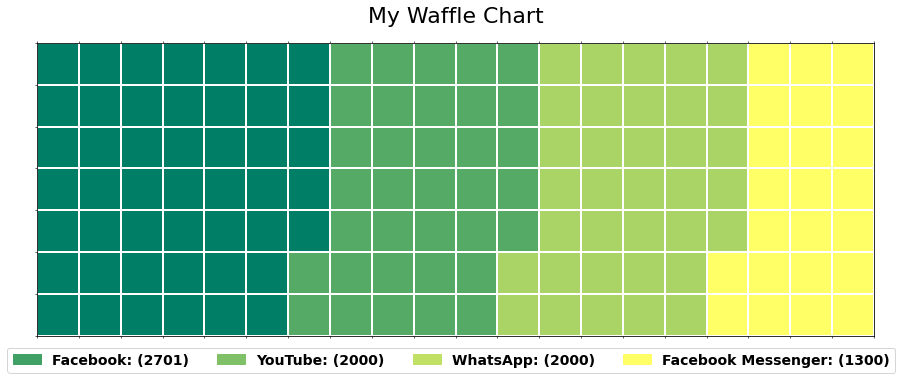

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as font_manager

'''
Step 1. Setting up the data
           categories  values
0            Facebook    2701
1             YouTube    2000
2            WhatsApp    2000
3  Facebook Messenger    1300
'''

data = {
    'categories': ['YouTube', 'Facebook', 'WhatsApp', 'Facebook Messenger'],
    'values': [2000, 2701, 2000, 1300]
}

df = pd.DataFrame(data)
df.sort_values(by=['values'], axis=0, ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)


'''
Step 2. set waffle size
'''
waffle_width = 20 # column number
waffle_height = 7 # row number

companies = df['categories']
values = df['values']


'''
Step 3.1 Calculuate item proportion
'''
proportions = [value/sum(values) for value in values]

'''
Step 3.2 Calculuate total blocks/chunks
'''
total_blocks = waffle_width * waffle_height

'''
Step 3.3 Calculate chunk blocks
'''
blocks_per_chunk = [round(proportion * total_blocks) for proportion in proportions]


'''
Step 4. Generate matrix table
20 * 7
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
'''

matrix_table = np.zeros((waffle_height, waffle_width))

# 1, 2, 3, 4
'''
[[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4.]]
'''
company_identifier = 0
block_index = 0

for col in range(waffle_width):
    for row in range(waffle_height):
        block_index += 1

        if block_index > sum(blocks_per_chunk[0:company_identifier]):
            company_identifier += 1

        matrix_table[row, col] = company_identifier

'''
Step 5. Graph the waffle chart
'''
fig, axes = plt.subplots(figsize=(15, 7)) # width, height

color_map_style = plt.cm.summer
matshow = axes.matshow(matrix_table, cmap=color_map_style)

# graph axes object
ax = plt.gca()

# inserting the minor ticks
ax.set_xticks(np.arange(-.5, waffle_width, 1), minor=True)
ax.set_yticks(np.arange(-.5, waffle_height, 1), minor=True)

# apply gridlines
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.set_title('My Waffle Chart', fontdict={'fontsize': 22, 'fontweight': 'medium'})

plt.xticks([])
plt.yticks([])


'''
Step 6. Insert a legend
'''
legend = []
for indx, company_name in enumerate(companies):
    label_text = '{1}: ({0})'.format(values[indx], company_name)
    color_value = color_map_style(int(indx+1)/len(companies))
    legend.append(mpatches.Patch(color=color_value, label=label_text))

font = font_manager.FontProperties(
    family='Comic Sans MS',
    weight='bold',
    style='normal',
    size=14
)

plt.legend(
    handles=legend,
    loc='lower center',
    ncol=len(companies),
    prop=font,
    bbox_to_anchor=(0.02, -.15, 0.95, 0.7) # x, y, width, height
)   

plt.show()